In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import f1_score, precision_score,accuracy_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

Yapay zeka 2.ödev için kullandığımız algoritmalar ve bu algoritmaların performanslarını değerlendirdiğimiz paketleri kütüphanelerden import ettik.

In [2]:

df=pd.read_csv("Yapayzeka2.csv")

Anket sonucu oluşturmuş olduğumuz veriyi csv formatına çevirdik ve bunu pandas yardımıyla df adlı tablo şeklindeki dataframe veri yapısana dönüştürdük.

In [3]:
df.head()

,Yeni deneyimler yasamaktan hoslanir misiniz?,Sinirlarinizi zorlamaktan hoslanir misiniz?,"Sinirlarinizi zorladiginizda, genellikle hissettiginiz duygu hangisine daha yakindir?",Finansal yatirimlar veya is firsatlari konusunda risk almaktan kaciniyor musunuz?,Yeni yerler kesfetmek veya seyahat etmek size heyecan verir mi?,onemli bir karar almadan once genellikle ne yaparsiniz?,"Gercekten ilginizi ceken bir firsatla karsilastiginizda, genellikle nasil bir tepki verirsiniz?",belirsizlik veya degisimle nasil basa cikarsiniz?,"Diger insanlarin risk alma davranislarini gozlemlediginizde, genellikle ne dusunursunuz?",Risk alma egilimi acisindan kendinizi nasil degerlendirirsiniz?
0,0,1,0,1,0,2,1,0,0,Risk almaktan hoslanan
1,0,1,0,2,0,0,0,0,0,Risk almaktan hoslanan
2,0,0,0,2,0,0,1,1,1,Risk almaktan hoslanan
3,0,0,0,0,0,1,0,1,1,Riskten kacinan
4,1,1,0,1,0,2,1,1,1,Riskten kacinan


Burda default olarak ilk 5 değeri görüyoruz.

In [4]:
df.shape

(207, 10)

verimiz toplam 207 adet satırdan ve 10 adet özellikten oluşuyor.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 10 columns):
 #   Column                                                                                           Non-Null Count  Dtype 
---  ------                                                                                           --------------  ----- 
 0   Yeni deneyimler yasamaktan hoslanir misiniz?                                                     207 non-null    int64 
 1   Sinirlarinizi zorlamaktan hoslanir misiniz?                                                      207 non-null    int64 
 2   Sinirlarinizi zorladiginizda, genellikle hissettiginiz duygu hangisine daha yakindir?            207 non-null    int64 
 3   Finansal yatirimlar veya is firsatlari konusunda risk almaktan kaciniyor musunuz?                207 non-null    int64 
 4   Yeni yerler kesfetmek veya seyahat etmek size heyecan verir mi?                                  207 non-null    int64 
 5   onemli bir kara

Verimizde herhangi bir null değer bulunmamakla birlikte verimizin sorulardan oluşan kısmı int64 tipindeyken cevap kısmı object tipindedir.

In [6]:
df.describe()

,Yeni deneyimler yasamaktan hoslanir misiniz?,Sinirlarinizi zorlamaktan hoslanir misiniz?,"Sinirlarinizi zorladiginizda, genellikle hissettiginiz duygu hangisine daha yakindir?",Finansal yatirimlar veya is firsatlari konusunda risk almaktan kaciniyor musunuz?,Yeni yerler kesfetmek veya seyahat etmek size heyecan verir mi?,onemli bir karar almadan once genellikle ne yaparsiniz?,"Gercekten ilginizi ceken bir firsatla karsilastiginizda, genellikle nasil bir tepki verirsiniz?",belirsizlik veya degisimle nasil basa cikarsiniz?,"Diger insanlarin risk alma davranislarini gozlemlediginizde, genellikle ne dusunursunuz?"
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.342995,0.623188,0.956522,0.888889,0.289855,0.869565,1.057971,0.850242,1.149758
std,0.560198,0.625543,1.158775,0.593019,0.585458,1.122320,0.628237,0.576049,1.141362
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.500000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2.000000
max,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000


Verimiz hakkında bazı istatistiksel bilgiler.

In [ ]:
# 5 farklı algoritma  örneği  
# Lojistik Regresyon
#  Karar Ağaçları (decision tree)
#  K-En Yakın Komşu (K-Nearest Neighbors)
#  Destek Vektör Makineleri (Support Vector Machines)
#  Random forest

In [7]:
X=df.iloc[:,:-1] #Attributes
y=df.iloc[:,-1]#etiket

Verimizin sorulardan oluşan kısmını X, Cevaptan oluşan kısmını y değerine kaydettik.

In [8]:
# 4. Tahminleyici Seçimi
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    SVC(),
    RandomForestClassifier(),
    AdaBoostClassifier()
  
]

Tahminleyicilerimizi bir classifiers arrayinde topladık.Toplam da 6 adet kullandık.

In [9]:

results =  []
for classifier in classifiers:
    f1_scores = cross_val_score(classifier, X, y, cv=10, scoring='f1_macro')
    precision_scores = cross_val_score(classifier, X, y, cv=10, scoring='precision_macro')
    accuracy_scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    recall_scores = cross_val_score(classifier, X, y, cv=10, scoring='recall_macro')
    results.append({
        'Classifier': classifier.__class__.__name__,
        'F1 Score': f1_scores.mean(),
        'Precision Score': precision_scores.mean(),
        'Accuracy Score': accuracy_scores.mean(),
        'Recall Score': recall_scores.mean()
    })
  

Tüm tahminleyicilerimizi 10 katlı çapraz doğrulama yaparak sırasıyla bunların f1 score,precision score,accuracy ve recall değerlerini kaydettik.

In [10]:
# 5. İstatistiksel Anlamlı Farkların Kontrolü (t-test)
ttest_results = []
for i in range(len(classifiers)):
    for j in range(i+1, len(classifiers)):
        classifier1 = classifiers[i]
        classifier2 = classifiers[j]
        f1_scores1 = cross_val_score(classifier1, X, y, cv=10, scoring='f1_macro')
        f1_scores2 = cross_val_score(classifier2, X, y, cv=10, scoring='f1_macro')
        t_statistic, p_value = ttest_ind(f1_scores1, f1_scores2)
        ttest_results.append({
            'Classifier 1': classifier1.__class__.__name__,
            'Classifier 2': classifier2.__class__.__name__,
            't-Statistic': t_statistic,
            'p-Value': p_value
        })


Burda tahminleyicilerimiz arasındaki istatistiksel farkları kontrol edebilmek için t-testten yararlandık

In [12]:

print("\nT-Test Sonuçları:")
df_ttest = pd.DataFrame(ttest_results)

df_ttest


T-Test Sonuçları:


,Classifier 1,Classifier 2,t-Statistic,p-Value
0,LogisticRegression,DecisionTreeClassifier,1.709094,0.104618
1,LogisticRegression,KNeighborsClassifier,1.984072,0.062710
2,LogisticRegression,SVC,0.395218,0.697326
3,LogisticRegression,RandomForestClassifier,0.424197,0.676449
4,LogisticRegression,AdaBoostClassifier,1.529353,0.143561
5,DecisionTreeClassifier,KNeighborsClassifier,0.740568,0.468507
6,DecisionTreeClassifier,SVC,-1.224324,0.236613
7,DecisionTreeClassifier,RandomForestClassifier,-1.141612,0.268576
8,DecisionTreeClassifier,AdaBoostClassifier,0.310201,0.759971
9,KNeighborsClassifier,SVC,-1.759257,0.095520


t-test sonuçları burda

In [13]:
df_results = pd.DataFrame(results)

In [14]:
df_results

,Classifier,F1 Score,Precision Score,Accuracy Score,Recall Score
0,LogisticRegression,0.711329,0.725930,0.715000,0.715455
1,DecisionTreeClassifier,0.641047,0.689082,0.675476,0.650455
2,KNeighborsClassifier,0.631342,0.640277,0.636905,0.635000
3,SVC,0.698100,0.704899,0.700000,0.699091
4,RandomForestClassifier,0.695989,0.706781,0.714048,0.715000
5,AdaBoostClassifier,0.656666,0.669180,0.661429,0.662273


Burda algoritmaların performans karşılaştırmalarını görebiliyoruz.

In [15]:
correlation_matrix = pd.DataFrame(X).corr()


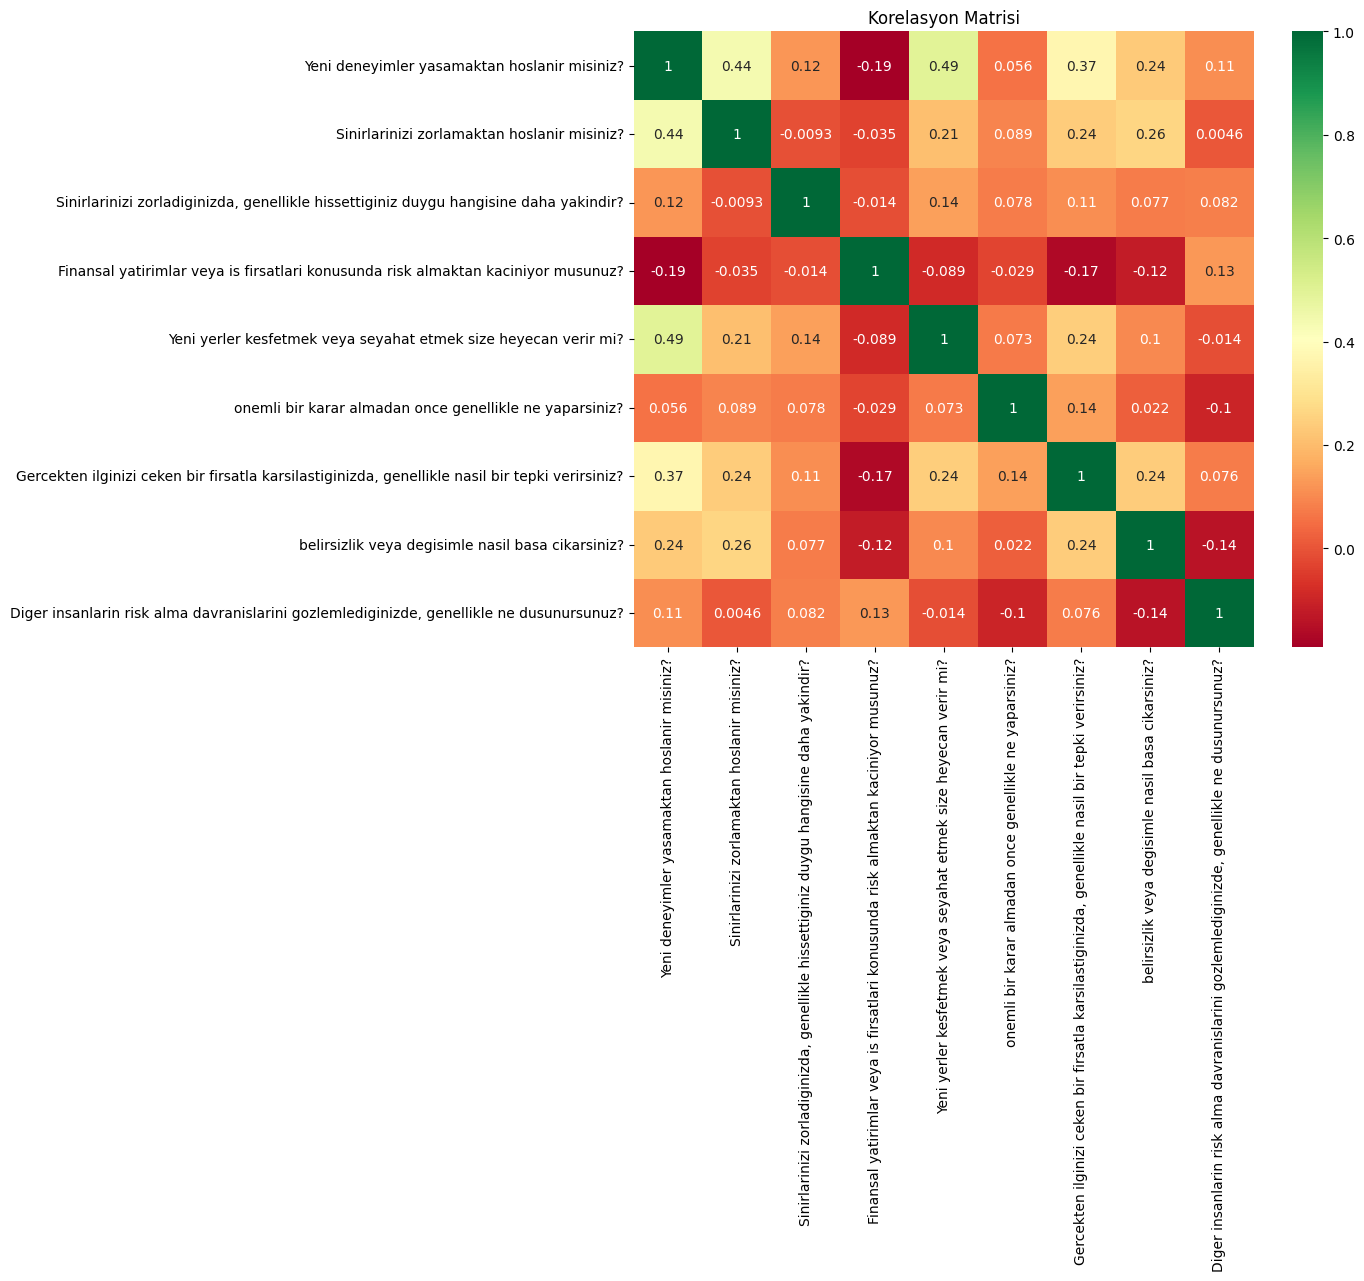

In [16]:
# Korelasyon matrisini görselleştirme
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Korelasyon Matrisi')
plt.show()

In [17]:
rf_model = RandomForestClassifier()

Attributeslarımızın arasındaki önem ilişkisini görmek için randomforest algoritmasını kullanmayı tercih ettim.

In [18]:
rf_model.fit(X, y)

RandomForestClassifier()

In [23]:
feature_importances = rf_model.feature_importances_

In [24]:
feature_names = X.columns

In [25]:
indices = np.argsort(feature_importances)[::-1]

C:\Users\ysfcl\AppData\Local\Temp\ipykernel_13468\1693039766.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


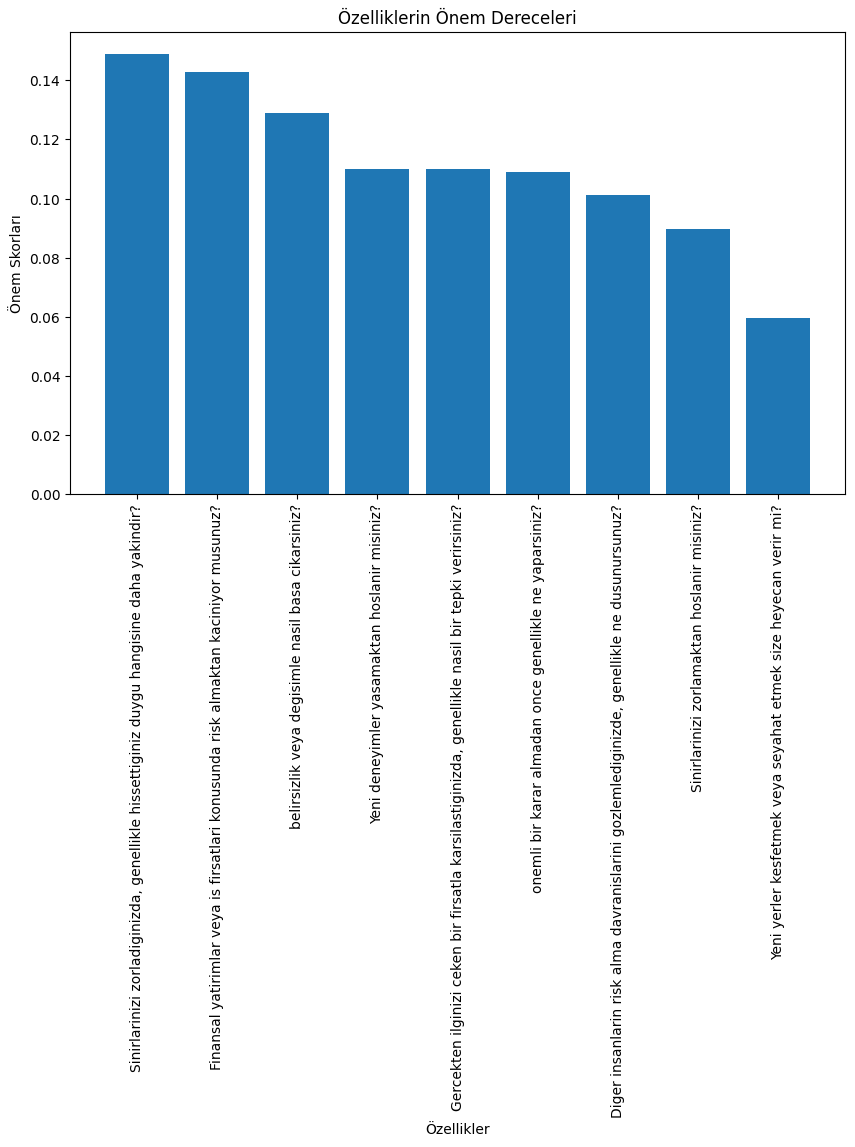

In [26]:

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Özellikler')
plt.ylabel('Önem Skorları')
plt.title('Özelliklerin Önem Dereceleri')
plt.tight_layout()
plt.show()

Özellikler ve önem dereceleri verilmiştir


In [28]:
# Özellik Dönüşümü ve Normalizasyon  Daha sonra, PCA ve StandardScaler ile özellik seçimi, özellik dönüşümü ve normalizasyon işlemleri gerçekleştirilen kısım burası
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Özelliklerin normalizasyonu

Bu kısımda biraz normalizasyon ve pca işlemleri yapıp tekrar 10 katlı çaprazlama yapıp sonuçları kontrol edeceğiz. Yukarıda bulmuş olduğumuz önem sıramıza göre ilk 7 tane bileşeni kullanıp modellerimizi eğitmeyi amaçladık.

In [29]:
pca = PCA(n_components=7)  # İlk 7 bileşene indirgeme
X_pca = pca.fit_transform(X_scaled)

Aşağıda 10 katlı çapraz sorgulama işlemleri var yine ama bu sefer veri de normalizasyon yapmayı denedik.

In [31]:
results =  []
for classifier in classifiers:
    f1_scores = cross_val_score(classifier, X, y, cv=10, scoring='f1_macro')
    precision_scores = cross_val_score(classifier, X, y, cv=10, scoring='precision_macro')
    accuracy_scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    recall_scores = cross_val_score(classifier, X, y, cv=10, scoring='recall_macro')
    results.append({
        'Classifier': classifier.__class__.__name__,
        'F1 Score': f1_scores.mean(),
        'Precision Score': precision_scores.mean(),
        'Accuracy Score': accuracy_scores.mean(),
        'Recall Score': recall_scores.mean()
    })

In [32]:
df_results = pd.DataFrame(results)

In [33]:
df_results

,Classifier,F1 Score,Precision Score,Accuracy Score,Recall Score
0,LogisticRegression,0.711329,0.725930,0.715000,0.715455
1,DecisionTreeClassifier,0.651731,0.695200,0.655952,0.646818
2,KNeighborsClassifier,0.631342,0.640277,0.636905,0.635000
3,SVC,0.698100,0.704899,0.700000,0.699091
4,RandomForestClassifier,0.706343,0.731983,0.709286,0.704545
5,AdaBoostClassifier,0.656666,0.669180,0.661429,0.662273


normalizasyon yaptığımız durum da sonuçlardan logistic regression ve randomforest algoritmaları daha iyi sonuçlar verdi.